# K-Fold

*   In machine learning, we couldn’t fit the model on the training data and can’t say that the model will work accurately for the real data. For this, we must assure that our model got the correct patterns from the data


*  To evaluate the performance of a model on unseen data



Types of cross validation

1.   Holdout Validation(train set->70-80% & Tset set-> 2-30%)
2.   LOOCV (Leave One Out Cross Validation)->the model is trained on all data points except one, and it is tested on the remaining data point. This process is repeated for every data point in the dataset
3. Stratified Cross-Validation
2. K-Fold Cross Validation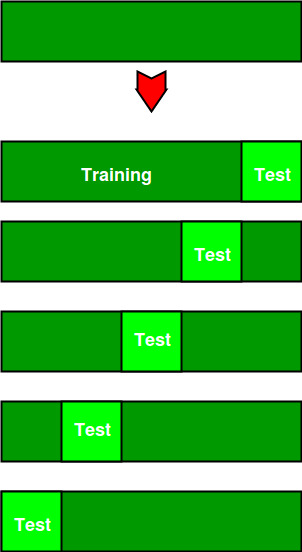

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.3)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
print(kf)

KFold(n_splits=3, random_state=None, shuffle=False)


In [ ]:
kf.split([1,2,3,4,5,6,7,8,9])
kfold = KFold(n_splits=3)
for train_index,test_index in kfold.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)
print(folds)

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val= cross_val_score(LogisticRegression(),digits.data,digits.target)
cross_val= cross_val_score(SVC(),digits.data,digits.target)
cross_val = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data,digits.target)# total iteration reached limit so it will not show like that we have to work in cross validation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# Principal component analysis

In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_digits
dataset=load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [13]:
dataset.data.shape

(1797, 64)

In [16]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

<Figure size 200x200 with 0 Axes>

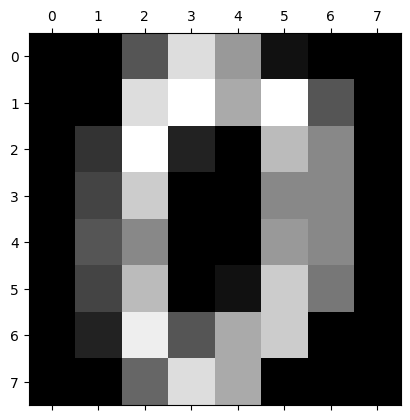

In [27]:
from matplotlib import pyplot as plt
plt.gray()
# plt.figure(figsize=(2,2)) not reducing size
plt.matshow(dataset.data[0].reshape(8,8))

In [30]:
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
dataset.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [37]:
df=pd.DataFrame(dataset.data, columns=dataset.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [46]:
X=df

In [47]:
y=dataset.target

In [54]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit_transform(X)
x_scale=scale
x_scale

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.3, random_state=42)

In [55]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression().fit(X_train, y_train)

In [56]:
lgr.score(X_train, y_train)

1.0

In [57]:
lgr.score(X_test, y_test)

0.9648148148148148

In [61]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
x_pca=pca.fit_transform(X)

In [62]:
x_pca.shape

(1797, 29)

In [63]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=42)

In [64]:
model=LogisticRegression().fit(X_train_pca, y_train)
model.score(X_train_pca, y_train)

1.0

In [65]:
model.score(X_test_pca, y_test)

0.9592592592592593

# Bias vs Variance
What is Bias?
Bias is simply defined as the inability of the model because of that there is some difference or error occurring between the model’s predicted value and the actual value.

What is Variance?
Variance is the measure of spread in data from its mean position. In machine learning variance is the amount by which the performance of a predictive model changes when it is trained on different subsets of the training data.

High Bias, Low Variance: A model with high bias and low variance is said to be underfitting.

High Variance, Low Bias: A model with high variance and low bias is said to be overfitting.

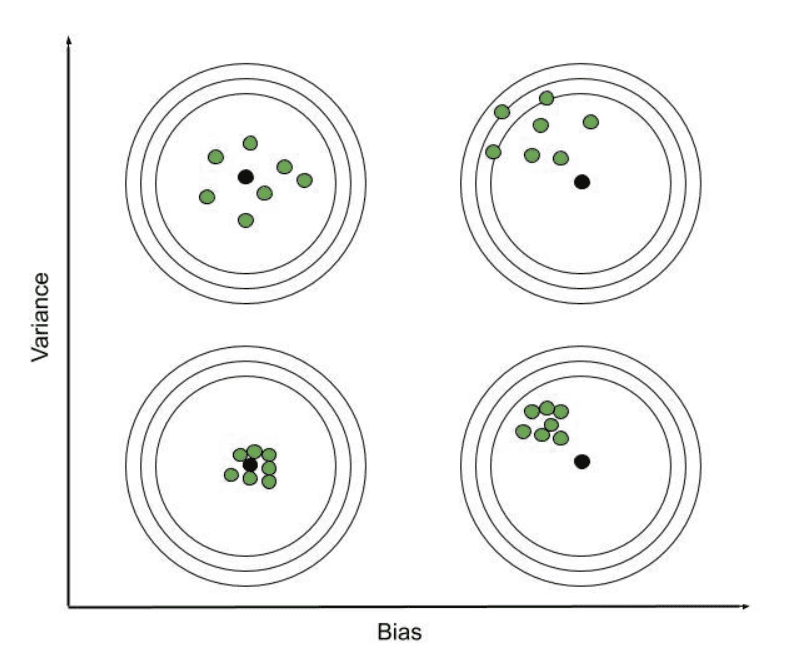

# Ensemble Learning

In [66]:
import pandas as pd
path='/content/diabetes.csv'
df=pd.read_csv(path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [67]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [82]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [81]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


In [83]:
X=df.drop('Outcome', axis='columns') #drops a column (Outcome).
# X=df.drop(df.Outcome) #tries to drop rows where the index matches values from the Outcome column.
y=df.Outcome

In [84]:
X.shape

(768, 8)

In [85]:
y.shape

(768,)

In [86]:
from sklearn.preprocessing import StandardScaler
x_scale=StandardScaler().fit_transform(X)
x_scale

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [87]:
# The stratify parameter ensures that the train and test splits have the same proportion of each class in y as in the original dataset.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scale, y,stratify=y,random_state=42)

In [88]:
X_train.shape

(576, 8)

In [89]:
y_train.shape

(576,)

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(DecisionTreeClassifier(),X,y,cv=5)

In [93]:
score.mean()

0.717545199898141

In [96]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator=DecisionTreeClassifier(),
                        n_estimators=100,
                        max_samples=0.8,
                        oob_score=True,
                        random_state=0).fit(X, y)

In [99]:
clf.oob_score_

0.7669270833333334

In [100]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator=DecisionTreeClassifier(),
                        n_estimators=100,
                        max_samples=0.8,
                        oob_score=True,
                        random_state=0)
score=cross_val_score(clf,X,y,cv=5)
score

array([0.75324675, 0.72727273, 0.74675325, 0.82352941, 0.73856209])

In [101]:
score.mean()

0.7578728461081402

In [102]:
from sklearn.ensemble import RandomForestClassifier
score=cross_val_score(RandomForestClassifier(),X,y,cv=5)
score.mean()

0.7683048977166624